In [1]:
# import the lottery_results_final.json file
import json

with open('lottery_results_final.json', 'r') as file:
    data = json.load(file)

len(data)

1077

In [1]:
import pandas as pd
from collections import Counter

def analyze_winning_numbers():
    # Read the CSV file
    df = pd.read_csv('lottery_results.csv')
    
    # Filter for dates after July 2019 (RNG era)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Combine all main numbers into a single list
    all_numbers = []
    for i in range(1, 8):  # 7 main numbers
        column = f'Main Numbers {i}'
        # Convert to integers and add to list
        numbers = df[column].astype(str).str.strip().astype(int).tolist()
        all_numbers.extend(numbers)
    
    # Count frequency of each number
    number_counts = Counter(all_numbers)
    
    # Get the total number of draws
    total_draws = len(df)
    
    # Calculate probability for each number
    probabilities = {
        num: {
            'count': count,
            'probability': (count / total_draws) * 100
        }
        for num, count in number_counts.items()
    }
    
    # Sort by frequency, highest to lowest
    sorted_numbers = sorted(probabilities.items(), key=lambda x: x[1]['count'], reverse=True)
    
    print(f"\nAnalysis based on {total_draws} draws:\n")
    print("Top 20 Most Frequent Numbers:")
    print("Number | Times Drawn | Probability")
    print("-" * 35)
    for num, stats in sorted_numbers[:20]:
        print(f"{num:2d} | {stats['count']:11d} | {stats['probability']:6.2f}%")
    
    print("\nRecommended 7 numbers based on historical frequency:")
    recommended = [num for num, _ in sorted_numbers[:7]]
    print(sorted(recommended))

analyze_winning_numbers()



Analysis based on 560 draws:

Top 20 Most Frequent Numbers:
Number | Times Drawn | Probability
-----------------------------------
19 |          94 |  16.79%
46 |          94 |  16.79%
32 |          90 |  16.07%
36 |          89 |  15.89%
 7 |          88 |  15.71%
26 |          88 |  15.71%
28 |          88 |  15.71%
22 |          87 |  15.54%
38 |          87 |  15.54%
30 |          86 |  15.36%
 2 |          85 |  15.18%
40 |          85 |  15.18%
25 |          84 |  15.00%
 9 |          83 |  14.82%
31 |          83 |  14.82%
 5 |          82 |  14.64%
18 |          82 |  14.64%
 4 |          82 |  14.64%
39 |          82 |  14.64%
 1 |          81 |  14.46%

Recommended 7 numbers based on historical frequency:
[7, 19, 26, 28, 32, 36, 46]


In [3]:
import pandas as pd
from collections import Counter
from itertools import combinations

def analyze_number_combinations():
    # Read the CSV file
    df = pd.read_csv('lottery_results.csv')
    
    # Filter for dates after July 2019 (RNG era)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Create a list of all 7-number combinations from each draw
    all_combinations = []
    for index, row in df.iterrows():
        numbers = [
            int(row[f'Main Numbers {i}']) 
            for i in range(1, 8)
        ]
        all_combinations.append(tuple(sorted(numbers)))
    
    # Count frequency of each combination
    combination_counts = Counter(all_combinations)
    
    # Calculate pair frequencies (numbers that appear together)
    pair_counts = Counter()
    for combo in all_combinations:
        # Get all possible pairs from the 7 numbers
        pairs = list(combinations(combo, 2))
        pair_counts.update(pairs)
    
    total_draws = len(df)
    
    print(f"\nAnalysis based on {total_draws} draws:\n")
    
    # Most common pairs
    print("\nMost Common Pairs of Numbers:")
    print("Pair | Times Drawn | Probability")
    print("-" * 35)
    for pair, count in pair_counts.most_common(10):
        prob = (count / total_draws) * 100
        print(f"{str(pair):15s} | {count:11d} | {prob:6.2f}%")
    
    # Analyze consecutive numbers
    consecutive_counts = Counter()
    for combo in all_combinations:
        for i in range(len(combo)-1):
            if combo[i+1] - combo[i] == 1:
                consecutive_counts.update([(combo[i], combo[i+1])])
    
    print("\nMost Common Consecutive Number Pairs:")
    print("Consecutive Pair | Times Drawn | Probability")
    print("-" * 45)
    for pair, count in consecutive_counts.most_common(10):
        prob = (count / total_draws) * 100
        print(f"{str(pair):15s} | {count:11d} | {prob:6.2f}%")

analyze_number_combinations()


Analysis based on 560 draws:


Most Common Pairs of Numbers:
Pair | Times Drawn | Probability
-----------------------------------
(22, 46)        |          21 |   3.75%
(30, 37)        |          19 |   3.39%
(7, 18)         |          19 |   3.39%
(19, 46)        |          19 |   3.39%
(26, 28)        |          19 |   3.39%
(4, 44)         |          19 |   3.39%
(3, 19)         |          18 |   3.21%
(7, 30)         |          18 |   3.21%
(24, 48)        |          18 |   3.21%
(26, 46)        |          18 |   3.21%

Most Common Consecutive Number Pairs:
Consecutive Pair | Times Drawn | Probability
---------------------------------------------
(38, 39)        |          18 |   3.21%
(12, 13)        |          17 |   3.04%
(18, 19)        |          16 |   2.86%
(24, 25)        |          15 |   2.68%
(46, 47)        |          15 |   2.68%
(1, 2)          |          15 |   2.68%
(39, 40)        |          14 |   2.50%
(44, 45)        |          14 |   2.50%
(5, 6)          |  

In [3]:
%pip install numpy pandas scikit-learn tensorflow matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.9 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda  # Added Lambda here
import tensorflow as tf

def prepare_lottery_data():
    # Read and filter data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Create features
    X = []
    y = []
    sequence_length = 5  # Look at previous 5 draws to predict next one
    
    # Prepare sequences
    numbers = []
    for index, row in df.iterrows():
        draw = [int(row[f'Main Numbers {i}']) for i in range(1, 8)]
        numbers.append(draw)
    
    numbers = np.array(numbers)
    
    # Create sequences: use previous n draws to predict next draw
    for i in range(len(numbers) - sequence_length):
        X.append(numbers[i:i+sequence_length])
        y.append(numbers[i+sequence_length])
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

def create_model_with_better_matching():
    def match_focused_loss(y_true, y_pred):
        # Round predictions to valid lottery numbers (1-50)
        y_pred_rounded = tf.clip_by_value(tf.round(y_pred), 1, 50)
        
        # Calculate number of matches
        exact_matches = tf.reduce_sum(tf.cast(
            tf.abs(y_pred_rounded - y_true) < 0.5, 
            tf.float32
        ), axis=1)
        
        # Base MSE loss
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        
        # Add penalty for low matches (instead of subtracting match score)
        match_penalty = tf.reduce_mean(7.0 - exact_matches)  # 7 is max possible matches
        
        return mse + match_penalty * 0.5
    
    model = Sequential([
        LSTM(64, input_shape=(5, 7)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(7, activation='sigmoid'),  # Sigmoid to constrain output
        Lambda(lambda x: x * 49 + 1)  # Scale to 1-50 range
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=match_focused_loss,
        metrics=['mae']
    )
    
    return model

def evaluate_predictions(y_true, y_pred, thresholds=[3, 4, 5, 6, 7]):
    """Evaluate predictions based on number of correct matches"""
    matches = []
    for true, pred in zip(y_true, y_pred):
        # Round predictions to nearest integer
        pred_rounded = np.round(pred).clip(1, 50)
        # Count matches
        match_count = sum(abs(t - p) < 1 for t, p in zip(true, pred_rounded))
        matches.append(match_count)
    
    # Print statistics for different match thresholds
    print("\nPrediction Analysis:")
    for threshold in thresholds:
        count = sum(m >= threshold for m in matches)
        percentage = (count / len(matches)) * 100
        print(f"{threshold}+ numbers correct: {count} times ({percentage:.1f}%)")
    
    return matches

def train_with_validation():
    X, y = prepare_lottery_data()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Normalize targets to 0-1 range
    y_train = (y_train - 1) / 49
    y_test = (y_test - 1) / 49
    
    model = create_model_with_better_matching()
    
    # Early stopping with patience
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    # Reduce learning rate on plateau
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.0001
    )
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Make predictions and evaluate
    predictions = model.predict(X_test)
    predictions = predictions * 49 + 1  # Scale back to 1-50 range
    y_test = y_test * 49 + 1
    
    evaluate_predictions(y_test, predictions)
    
    return model, history

# Run training
model, history = train_with_validation()

Epoch 1/100


/Users/lang/max-bot/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 550.6201 - mae: 22.9426 - val_loss: 177.0773 - val_mae: 12.9454 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.0936 - mae: 9.5083 - val_loss: 6.7306 - val_mae: 1.6793 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2995 - mae: 1.3206 - val_loss: 2.1825 - val_mae: 0.5721 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1783 - mae: 0.5778 - val_loss: 2.1231 - val_mae: 0.5207 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0557 - mae: 0.5213 - val_loss: 2.1141 - val_mae: 0.5123 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0802 - mae: 0.5152 - val_loss: 2.1110 - val_mae: 0.5094 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1080 - mae: 0.5168 - val_loss: 2.1093 - val_mae: 0.5078 - learning_rate: 0.0010
Epoch 8/100
14/1

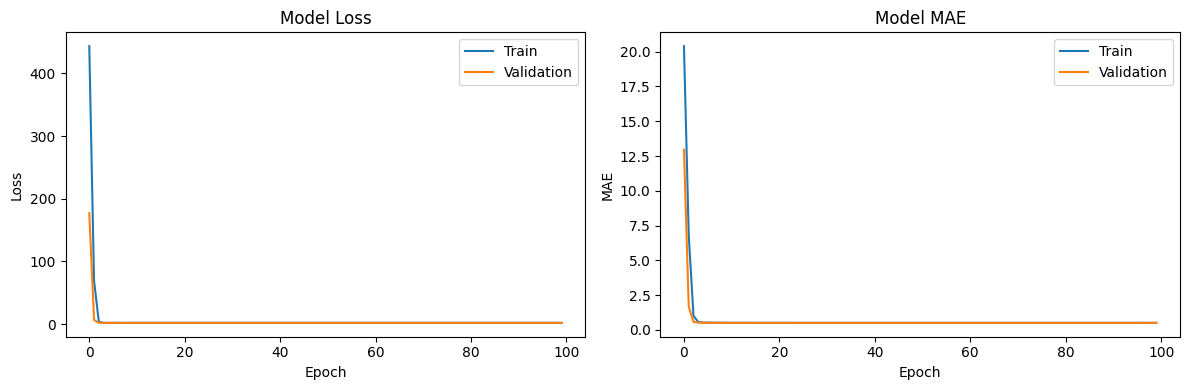


Training Analysis:
Minimum validation loss: 2.10 at epoch 100
Final validation loss: 2.10
Final validation MAE: 0.50

Overfitting Analysis:
Final training loss: 2.09
Final validation loss: 2.10
Loss difference: 0.01
Loss ratio: 1.01

Convergence Analysis:
Standard deviation of last 5 validation losses: 0.0000
Model appears to have converged (stable validation loss)


In [13]:
import matplotlib.pyplot as plt

def analyze_training(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze convergence
    min_val_loss = min(history.history['val_loss'])
    min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
    
    print("\nTraining Analysis:")
    print(f"Minimum validation loss: {min_val_loss:.2f} at epoch {min_val_loss_epoch + 1}")
    print(f"Final validation loss: {history.history['val_loss'][-1]:.2f}")
    print(f"Final validation MAE: {history.history['val_mae'][-1]:.2f}")
    
    # Check for overfitting
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    loss_diff = abs(train_loss - val_loss)
    loss_ratio = max(train_loss, val_loss) / min(train_loss, val_loss)
    
    print("\nOverfitting Analysis:")
    print(f"Final training loss: {train_loss:.2f}")
    print(f"Final validation loss: {val_loss:.2f}")
    print(f"Loss difference: {loss_diff:.2f}")
    print(f"Loss ratio: {loss_ratio:.2f}")
    
    if loss_ratio > 1.2:
        print("Warning: Possible overfitting detected (loss ratio > 1.2)")
    
    # Convergence check
    last_5_val_loss = history.history['val_loss'][-5:]
    val_loss_std = np.std(last_5_val_loss)
    print(f"\nConvergence Analysis:")
    print(f"Standard deviation of last 5 validation losses: {val_loss_std:.4f}")
    if val_loss_std < 0.1:
        print("Model appears to have converged (stable validation loss)")
    else:
        print("Model might benefit from more training (validation loss still varying)")

# After training the model:
analyze_training(history)

In [15]:
from collections import Counter
import pandas as pd

def analyze_lottery_statistics():
    # Read and filter data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Analyze number frequencies
    all_numbers = []
    for i in range(1, 8):
        numbers = df[f'Main Numbers {i}'].tolist()
        all_numbers.extend(numbers)
    
    freq = Counter(all_numbers)
    
    # Calculate statistics
    total_draws = len(df)
    expected_freq = total_draws * 7 / 50  # Expected frequency if truly random
    
    print(f"\nStatistical Analysis ({total_draws} draws):")
    print(f"Expected frequency per number: {expected_freq:.1f}")
    print("\nMost common numbers:")
    for num, count in freq.most_common(10):
        deviation = ((count - expected_freq) / expected_freq) * 100
        print(f"Number {num:2d}: {count:3d} times (deviation: {deviation:+.1f}%)")
    
    # Chi-square test for randomness
    chi_square = sum((count - expected_freq) ** 2 / expected_freq 
                    for count in freq.values())
    print(f"\nChi-square statistic: {chi_square:.2f}")
    
    # Additional analysis: Least common numbers
    print("\nLeast common numbers:")
    for num, count in sorted(freq.items(), key=lambda x: x[1])[:10]:
        deviation = ((count - expected_freq) / expected_freq) * 100
        print(f"Number {num:2d}: {count:3d} times (deviation: {deviation:+.1f}%)")
    
    return freq

# Run statistical analysis
frequencies = analyze_lottery_statistics()


Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)


In [25]:
import math
from itertools import combinations
import random

def calculate_optimal_combinations():
    total_numbers = 50
    numbers_to_pick = 7
    
    # Base probability of winning jackpot
    jackpot_combinations = math.comb(total_numbers, numbers_to_pick)
    base_probability = 1 / jackpot_combinations
    print(f"\nProbability Analysis:")
    print(f"Total possible combinations: {jackpot_combinations:,}")
    print(f"Base probability of jackpot: 1 in {jackpot_combinations:,}")
    
    # Probability and prize tiers for smaller wins
    prize_tiers = {
        7: "Division 1 (Jackpot)",
        6: "Division 2",
        5: "Division 3",
        4: "Division 4",
        3: "Division 5"
    }
    
    print("\nProbability by Prize Division:")
    for matches in range(3, 8):
        ways_to_match = math.comb(7, matches) * math.comb(43, 7-matches)
        probability = ways_to_match / math.comb(50, 7)
        print(f"{prize_tiers[matches]}: 1 in {1/probability:.2f}")

def generate_optimal_coverage(budget, ticket_cost=1):
    num_tickets = budget // ticket_cost
    print(f"\nGenerating optimal coverage for {num_tickets} tickets...")
    
    combinations = []
    base_numbers = list(range(1, 51))
    
    for i in range(num_tickets):
        # Use systematic spacing with some randomization
        start_idx = i % 44  # 50 - 7 + 1
        base_combo = base_numbers[start_idx:start_idx+7]
        
        # Add some randomization to avoid pure sequential numbers
        if random.random() < 0.3:  # 30% chance to modify
            random_idx = random.randint(0, 6)
            available = set(range(1, 51)) - set(base_combo)
            base_combo[random_idx] = random.choice(list(available))
        
        combinations.append(sorted(base_combo))
    
    # Analyze coverage
    numbers_used = set()
    for combo in combinations:
        numbers_used.update(combo)
    
    print(f"Number coverage: {len(numbers_used)}/50 numbers used")
    print(f"Average gap between numbers: {calculate_average_gap(combinations):.2f}")
    
    return combinations

def generate_balanced_tickets(num_tickets=10):
    balanced_tickets = []
    attempts = 0
    max_attempts = num_tickets * 100  # Prevent infinite loops
    
    def is_balanced(combination):
        high_count = sum(1 for x in combination if x > 25)
        even_count = sum(1 for x in combination if x % 2 == 0)
        gaps = [combination[i+1] - combination[i] for i in range(len(combination)-1)]
        
        return (2 <= high_count <= 5 and  # Balance high/low
                2 <= even_count <= 5 and  # Balance even/odd
                max(gaps) <= 15)          # Avoid large gaps
    
    while len(balanced_tickets) < num_tickets and attempts < max_attempts:
        attempts += 1
        # Generate random combination
        combo = sorted(random.sample(range(1, 51), 7))
        
        if is_balanced(combo) and combo not in balanced_tickets:
            balanced_tickets.append(combo)
    
    print(f"\nGenerated {len(balanced_tickets)} balanced tickets after {attempts} attempts")
    analyze_tickets(balanced_tickets)
    
    return balanced_tickets

def calculate_average_gap(combinations):
    total_gaps = 0
    gap_count = 0
    
    for combo in combinations:
        for i in range(len(combo)-1):
            total_gaps += combo[i+1] - combo[i]
            gap_count += 1
    
    return total_gaps / gap_count if gap_count > 0 else 0

def analyze_tickets(tickets):
    """Analyze the characteristics of generated tickets"""
    high_low_ratios = []
    even_odd_ratios = []
    
    for combo in tickets:
        high_count = sum(1 for x in combo if x > 25)
        even_count = sum(1 for x in combo if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
    
    print("\nTicket Analysis:")
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")

# Example usage
calculate_optimal_combinations()
optimal_tickets = generate_optimal_coverage(budget=100)
balanced_tickets = generate_balanced_tickets(num_tickets=5)

# Print example tickets
print("\nExample Optimal Tickets:")
for i, ticket in enumerate(optimal_tickets[:5], 1):
    print(f"Ticket {i}: {ticket}")

print("\nExample Balanced Tickets:")
for i, ticket in enumerate(balanced_tickets[:5], 1):
    print(f"Ticket {i}: {ticket}")


Probability Analysis:
Total possible combinations: 99,884,400
Base probability of jackpot: 1 in 99,884,400

Probability by Prize Division:
Division 5: 1 in 23.12
Division 4: 1 in 231.25
Division 3: 1 in 5267.33
Division 2: 1 in 331841.86
Division 1 (Jackpot): 1 in 99884400.00

Generating optimal coverage for 100 tickets...
Number coverage: 50/50 numbers used
Average gap between numbers: 1.69

Generated 5 balanced tickets after 10 attempts

Ticket Analysis:
Average high/low ratio: 0.54
Average even/odd ratio: 0.49

Example Optimal Tickets:
Ticket 1: [1, 2, 3, 4, 5, 6, 7]
Ticket 2: [2, 3, 4, 5, 6, 8, 50]
Ticket 3: [3, 4, 5, 6, 7, 8, 9]
Ticket 4: [4, 5, 6, 7, 8, 9, 10]
Ticket 5: [5, 6, 7, 8, 9, 11, 36]

Example Balanced Tickets:
Ticket 1: [3, 13, 15, 22, 33, 45, 50]
Ticket 2: [1, 2, 16, 21, 26, 35, 37]
Ticket 3: [1, 12, 21, 26, 30, 43, 48]
Ticket 4: [11, 14, 27, 34, 41, 48, 49]
Ticket 5: [7, 13, 24, 26, 36, 38, 40]


In [26]:
import random
from collections import Counter

def generate_smart_tickets(num_tickets=10, historical_weight=0.3):
    """
    Generate tickets using both historical frequencies and balanced distribution
    historical_weight: 0-1 value determining how much to factor in historical frequencies
    """
    # Get historical frequencies
    freq_data = analyze_lottery_statistics()  # Using your existing function
    
    # Calculate probability weights for each number
    total_draws = sum(freq_data.values())
    weights = {num: count/total_draws for num, count in freq_data.items()}
    
    def smart_number_selection():
        selected = []
        remaining = list(range(1, 51))
        
        while len(selected) < 7:
            # Calculate combined score for each remaining number
            scores = {}
            for num in remaining:
                # Historical frequency score
                freq_score = weights[num]
                
                # Balance score (if we already have some numbers)
                if selected:
                    high_count = sum(1 for x in selected if x > 25)
                    even_count = sum(1 for x in selected if x % 2 == 0)
                    
                    # Calculate balance factors
                    high_low_balance = 1.0 if ((num > 25 and high_count < 4) or 
                                             (num <= 25 and high_count >= 4)) else 0.5
                    even_odd_balance = 1.0 if ((num % 2 == 0 and even_count < 4) or 
                                             (num % 2 != 0 and even_count >= 4)) else 0.5
                    
                    # Gap score (prefer numbers with reasonable gaps)
                    if len(selected) > 0:
                        closest_gap = min(abs(num - x) for x in selected)
                        gap_score = 1.0 if 2 <= closest_gap <= 8 else 0.5
                    else:
                        gap_score = 1.0
                    
                    balance_score = (high_low_balance + even_odd_balance + gap_score) / 3
                else:
                    balance_score = 1.0
                
                # Combine scores
                scores[num] = (freq_score * historical_weight + 
                             balance_score * (1 - historical_weight))
            
            # Select number based on scores
            chosen = random.choices(
                population=list(scores.keys()),
                weights=list(scores.values()),
                k=1
            )[0]
            
            selected.append(chosen)
            remaining.remove(chosen)
        
        return sorted(selected)
    
    # Generate tickets
    tickets = []
    attempts = 0
    max_attempts = num_tickets * 100
    
    while len(tickets) < num_tickets and attempts < max_attempts:
        ticket = smart_number_selection()
        if ticket not in tickets:  # Avoid duplicates
            tickets.append(ticket)
        attempts += 1
    
    # Analyze generated tickets
    print(f"\nGenerated {len(tickets)} smart tickets:")
    analyze_smart_tickets(tickets, freq_data)
    
    return tickets

def analyze_smart_tickets(tickets, freq_data):
    """Analyze the characteristics of generated smart tickets"""
    print("\nTicket Analysis:")
    
    # Frequency analysis
    used_numbers = []
    for ticket in tickets:
        used_numbers.extend(ticket)
    number_freq = Counter(used_numbers)
    
    # Most used high-frequency numbers
    most_common = freq_data.most_common(10)
    high_freq_coverage = sum(1 for num, _ in most_common if num in number_freq)
    print(f"Coverage of top 10 historical numbers: {high_freq_coverage}/10")
    
    # Balance statistics
    high_low_ratios = []
    even_odd_ratios = []
    
    for ticket in tickets:
        high_count = sum(1 for x in ticket if x > 25)
        even_count = sum(1 for x in ticket if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
    
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")
    
    # Print example tickets
    print("\nExample Tickets:")
    for i, ticket in enumerate(tickets[:5], 1):
        high_freq_nums = sum(1 for num in ticket if num in [n for n, _ in most_common])
        print(f"Ticket {i}: {ticket} (Contains {high_freq_nums} frequent numbers)")

# Generate some smart tickets
smart_tickets = generate_smart_tickets(num_tickets=10, historical_weight=0.3)


Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)

Generated 10 smart tickets:

Ticket 

In [28]:
import random
from collections import Counter
import math
import pandas as pd

def generate_hybrid_tickets(num_tickets=10, randomness_factor=0.3, historical_weight=0.4):
    """
    Generate lottery tickets using a hybrid approach combining random and smart selection
    
    Parameters:
    - num_tickets: Number of tickets to generate
    - randomness_factor: 0-1, higher means more pure random tickets
    - historical_weight: 0-1, influence of historical frequencies in smart selection
    """
    tickets = []
    freq_data = analyze_lottery_statistics()  # Get historical data
    
    def generate_smart_ticket():
        selected = []
        remaining = list(range(1, 51))
        total_draws = sum(freq_data.values())
        weights = {num: count/total_draws for num, count in freq_data.items()}
        
        while len(selected) < 7:
            scores = {}
            for num in remaining:
                # Historical frequency score
                freq_score = weights.get(num, 0)
                
                # Balance factors
                if selected:
                    high_count = sum(1 for x in selected if x > 25)
                    even_count = sum(1 for x in selected if x % 2 == 0)
                    
                    # Calculate various balance scores
                    high_low_balance = 1.0 if ((num > 25 and high_count < 4) or 
                                             (num <= 25 and high_count >= 4)) else 0.5
                    even_odd_balance = 1.0 if ((num % 2 == 0 and even_count < 4) or 
                                             (num % 2 != 0 and even_count >= 4)) else 0.5
                    
                    # Gap analysis
                    closest_gap = min(abs(num - x) for x in selected)
                    gap_score = 1.0 if 2 <= closest_gap <= 8 else 0.5
                    
                    balance_score = (high_low_balance + even_odd_balance + gap_score) / 3
                else:
                    balance_score = 1.0
                
                # Combine scores with weights
                scores[num] = (freq_score * historical_weight + 
                             balance_score * (1 - historical_weight))
            
            # Select number based on weighted scores
            chosen = random.choices(
                population=list(scores.keys()),
                weights=list(scores.values()),
                k=1
            )[0]
            
            selected.append(chosen)
            remaining.remove(chosen)
        
        return sorted(selected)
    
    # Generate tickets using hybrid approach
    attempts = 0
    max_attempts = num_tickets * 100
    
    while len(tickets) < num_tickets and attempts < max_attempts:
        attempts += 1
        
        if random.random() < randomness_factor:
            # Pure random selection
            ticket = sorted(random.sample(range(1, 51), 7))
        else:
            # Smart balanced selection
            ticket = generate_smart_ticket()
        
        if ticket not in tickets:  # Avoid duplicates
            tickets.append(ticket)
    
    # Analyze and display results
    print(f"\nGenerated {len(tickets)} hybrid tickets:")
    print(f"Randomness factor: {randomness_factor:.2f}")
    print(f"Historical weight: {historical_weight:.2f}")
    analyze_hybrid_tickets(tickets, freq_data)
    
    return tickets

def analyze_hybrid_tickets(tickets, freq_data):
    """Detailed analysis of generated tickets"""
    print("\nTicket Analysis:")
    
    # Frequency analysis
    used_numbers = []
    for ticket in tickets:
        used_numbers.extend(ticket)
    number_freq = Counter(used_numbers)
    
    # Coverage analysis
    most_common_hist = freq_data.most_common(10)
    high_freq_coverage = sum(1 for num, _ in most_common_hist if num in number_freq)
    
    # Statistical measures
    high_low_ratios = []
    even_odd_ratios = []
    gaps = []
    
    for ticket in tickets:
        high_count = sum(1 for x in ticket if x > 25)
        even_count = sum(1 for x in ticket if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
        
        # Calculate gaps
        for i in range(len(ticket)-1):
            gaps.append(ticket[i+1] - ticket[i])
    
    # Print analysis
    print(f"\nCoverage Statistics:")
    print(f"Top 10 historical numbers coverage: {high_freq_coverage}/10")
    print(f"Number range coverage: {len(set(used_numbers))}/50")
    
    print(f"\nBalance Metrics:")
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")
    print(f"Average gap between numbers: {sum(gaps)/len(gaps):.2f}")
    
    # Print example tickets with analysis
    print("\nExample Tickets:")
    for i, ticket in enumerate(tickets[:5], 1):
        high_freq_nums = sum(1 for num in ticket if num in [n for n, _ in most_common_hist])
        print(f"Ticket {i}: {ticket}")
        print(f"Contains {high_freq_nums} frequent numbers")
        print(f"High/Low: {sum(1 for x in ticket if x > 25)}/{sum(1 for x in ticket if x <= 25)}")
        print(f"Even/Odd: {sum(1 for x in ticket if x % 2 == 0)}/{sum(1 for x in ticket if x % 2 != 0)}")
        print()

# Let's try different strategies
print("Strategy 1: More Random")
random_heavy = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.7, historical_weight=0.3)

print("\nStrategy 2: More Balanced")
balanced_heavy = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.3, historical_weight=0.7)

print("\nStrategy 3: Equal Mix")
balanced_mix = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.5, historical_weight=0.5)

Strategy 1: More Random

Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)

Generated 5 